<a href="https://colab.research.google.com/github/angelikipilioura/Computational-Data-Journalism/blob/main/homework_7_GreekNewsAnalysis_News247_Angeliki_Pilioura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Import necessary libraries
!pip install newspaper3k
import newspaper
from newspaper import Article
import requests
from bs4 import BeautifulSoup
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from newspaper import Article
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from spacy.lang.el.examples import sentences 
!python -m spacy download el_core_news_md

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2023-05-29 19:50:29.832809: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 MB 19.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_md')


CRITICAL:newspaper.network:[REQUEST FAILED] 404 Client Error: Not Found for url: https://www.news247.gr/rss
CRITICAL:newspaper.network:[REQUEST FAILED] 404 Client Error: Not Found for url: https://www.news247.gr/feeds
CRITICAL:newspaper.network:[REQUEST FAILED] 404 Client Error: Not Found for url: https://www.news247.gr/feed


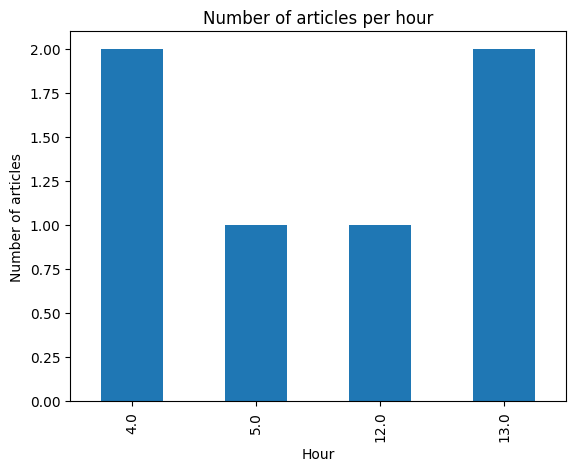

<Figure size 640x480 with 0 Axes>

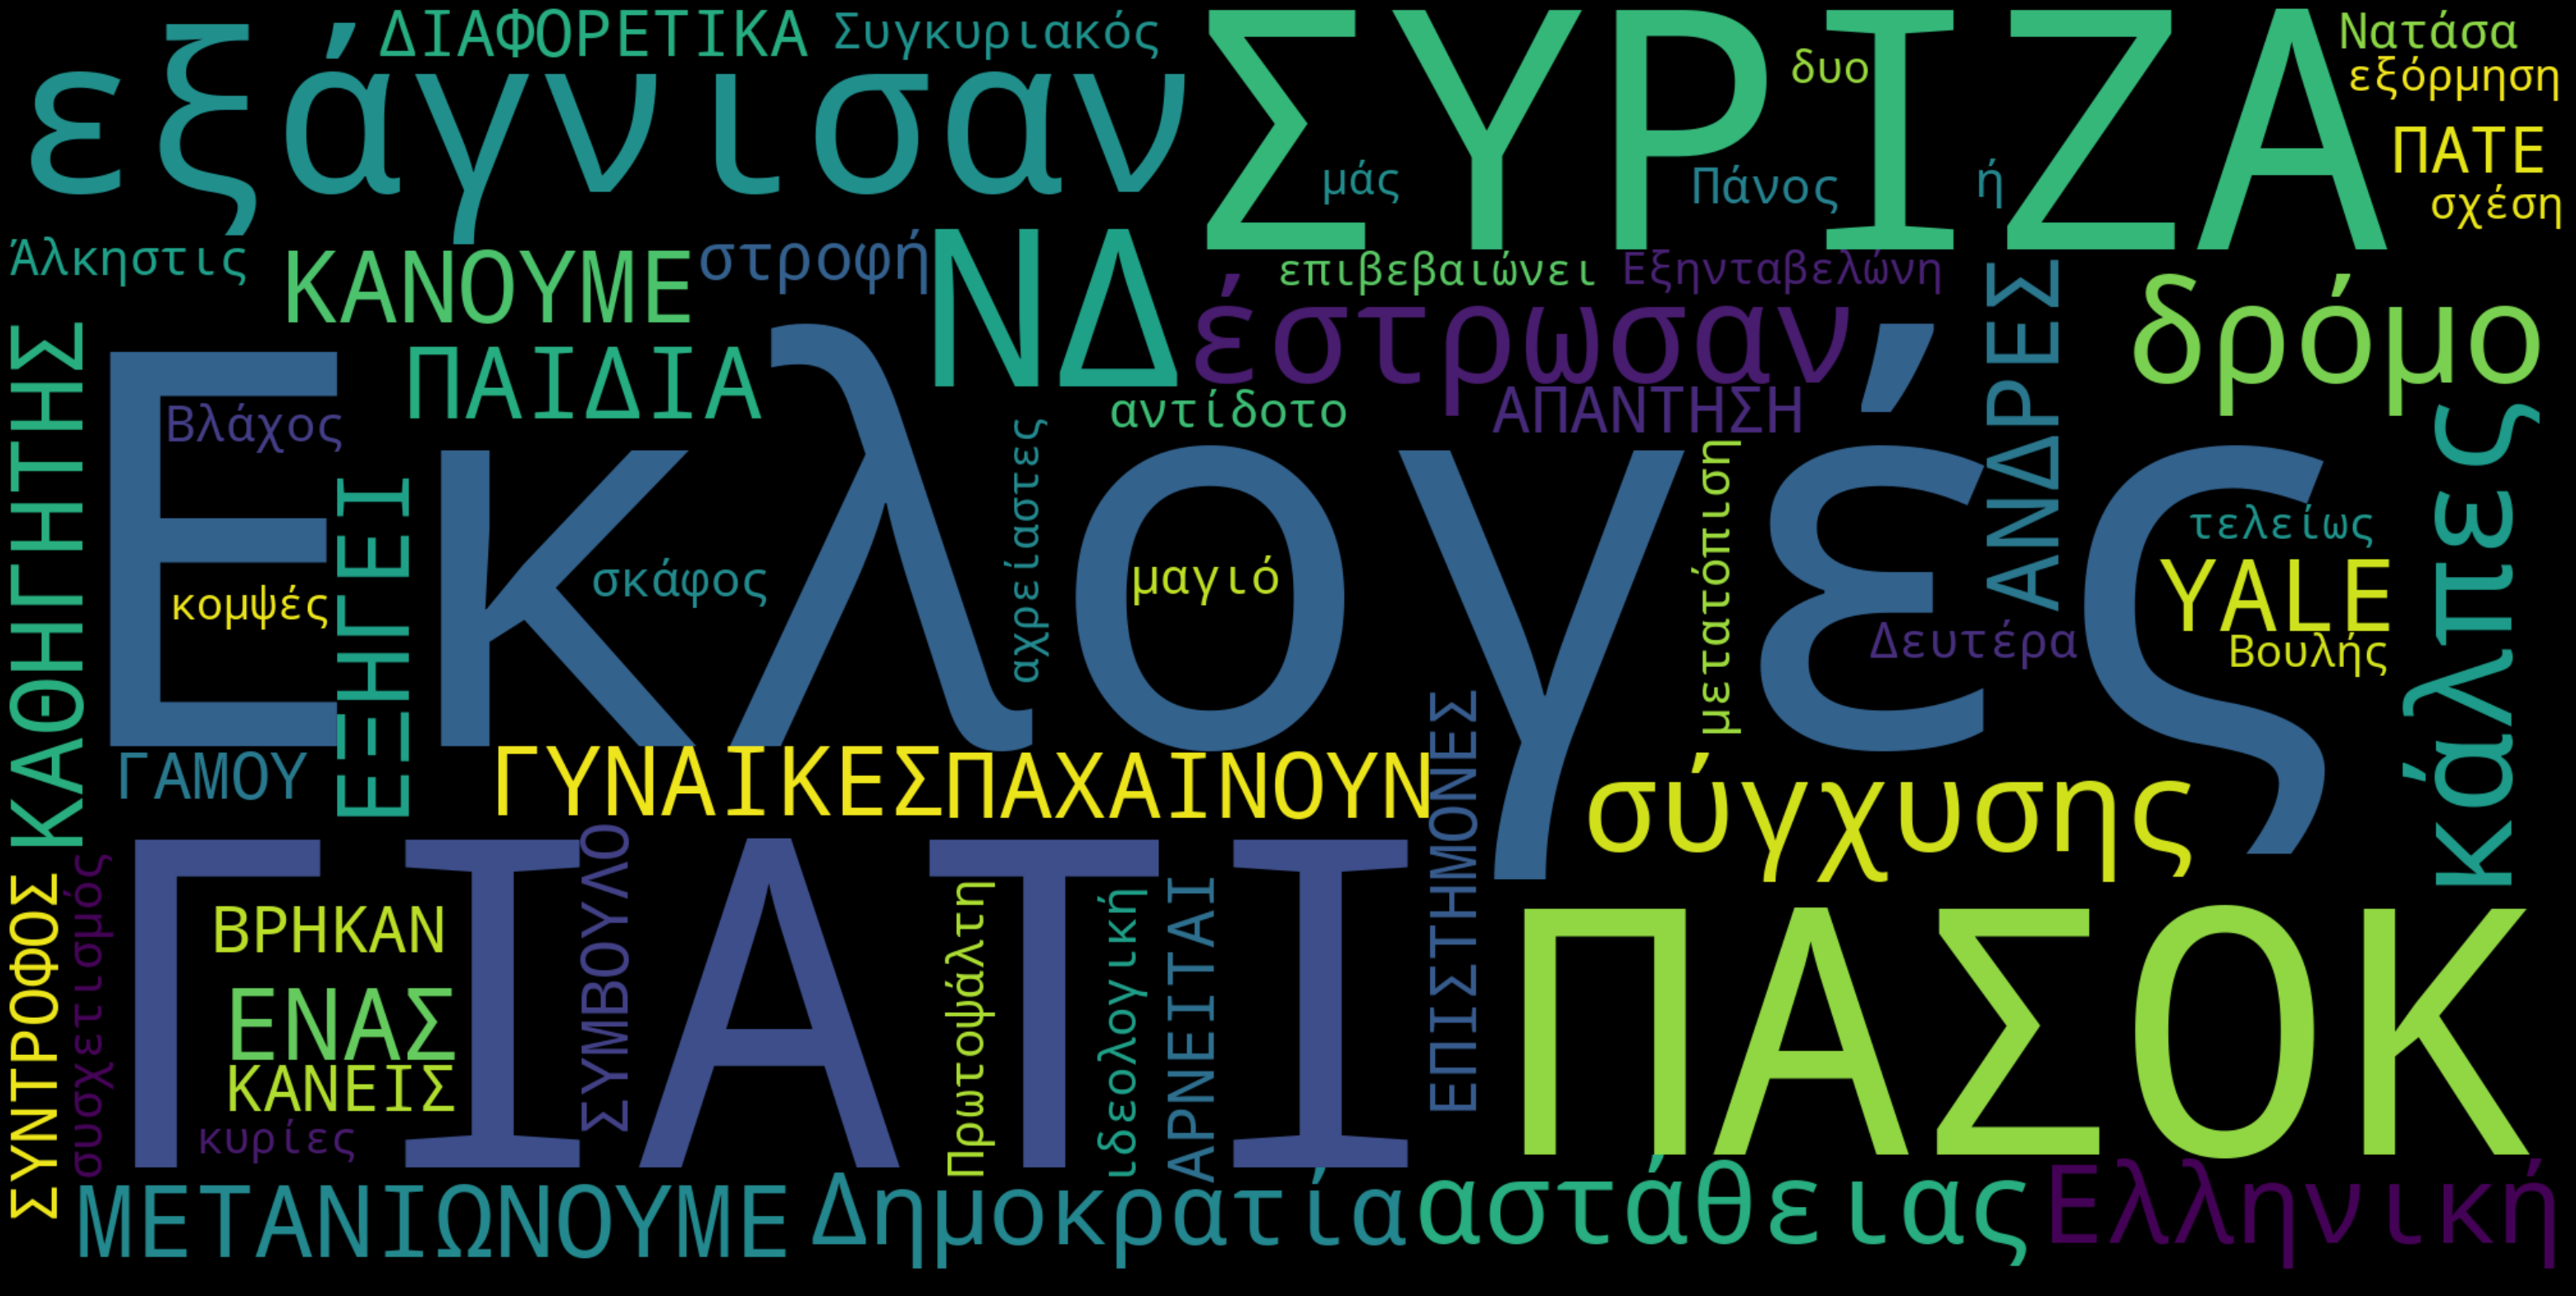

In [15]:
nlp = spacy.load('el_core_news_md')

def scrape_site(site_url, num_pages):
    articlesL = []
    
    for page in range(1, num_pages+1):
        page_url = f"{site_url}?page={page}"
        
        site = newspaper.build(page_url, memoize_articles=False)
        urlsL = site.article_urls()
        
        for url in urlsL[:10]:
            articleD = {}
            article = Article(url)
            article.download()
            article.parse()
            
            articleD['url'] = url
            articleD['date'] = article.publish_date if article.publish_date else np.nan
            articleD['title'] = article.title if article.title else np.nan
            articleD['text'] = article.text if article.text else np.nan
            articleD['summary'] = article.summary if article.summary else np.nan
            
            articlesL.append(articleD)

    return pd.DataFrame(articlesL)

site_url = "https://www.news247.gr/latest/"
num_pages = 1

df = scrape_site(site_url, num_pages)

df['date'] = pd.to_datetime(df['date'])
df['hour'] = df['date'].dt.hour

df['hour'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Hour')
plt.ylabel('Number of articles')
plt.title('Number of articles per hour')
plt.show()

plt.figure()

df['combined_text'] = df['title'].astype(str) + '. ' + df['summary'].astype(str)

text = ' '.join(df['combined_text'])
text = text.replace('nan', '')  # Remove 'nan' from text
wordcloud = WordCloud(stopwords = nlp.Defaults.stop_words, width = 2000, height = 1000, background_color = 'black').generate(text)

plt.figure(figsize = (40, 30), facecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()


**Παρατηρήσεις πάνω στα ευρήματα**

Καθώς πλησιάζουμε τις επαναληπτικές εκλογές στις 25 Ιουνίου, το ελληνικό μιντιακό τοπίο βρίσκεται σε έντονη κίνηση. Μια ανάλυση πρόσφατων άρθρων από το News247 αποκαλύπτει μια εντεινόμενη επικέντρωση σε πολιτικά κόμματα όπως το ΠΑΣΟΚ και το ΣΥΡΙΖΑ, καθώς και τη Νέα Δημοκρατία (ΝΔ). Το σύννεφο λέξεων που δημιουργήθηκε από τους τίτλους και τις περιλήψεις των άρθρων δείχνει μια δημόσια συζήτηση που κυριαρχείται από θέματα που σχετίζονται με τις εκλογές, αντανακλώντας την αβεβαιότητα και την προσμονή γύρω από την επερχόμενη ψηφοφορία. Ενδιαφέροντος, η πλειονότητα των άρθρων δημοσιεύτηκε κατά τις πρώτες πρωινές ώρες, υποδεικνύοντας μια προσπάθεια να φτάσουν στους αναγνώστες με φρέσκα νέα στην αρχή της ημέρας. Μέσα σε αυτή την πολιτική έξαρση, υπάρχουν επίσης αποσπάσματα της καθημερινής ζωής και κοινωνικά ζητήματα, με θέματα που κυμαίνονται από τις διαφορές στην αύξηση βάρους ανάμεσα σε άνδρες και γυναίκες, μέχρι την εκπαίδευση και την καθημερινή ζωή. Είναι σαφές ότι, παρά την πολιτική αβεβαιότητα, η ζωή συνεχίζεται και οι Έλληνες πολίτες προσπαθούν να προσαρμοστούν και να αντιμετωπίσουν τις προκλήσεις της καθημερινότητας. Η επικείμενη εκλογική αναμέτρηση, ωστόσο, παραμένει στο επίκεντρο της δημόσιας συζήτησης, καθώς η χώρα αναζητά την επόμενη κυβέρνηση που θα την οδηγήσει στο μέλλον.